# Data cleaning

For this lesson we will practice carrying out data cleaning on the following [Salary dataset](https://www.levels.fyi/js/salaryData.json) that is available on [levels.fyi](https://www.levels.fyi/)

In [26]:
""" We will begin by importing the modules that we will use. """
import pandas as pd
import numpy as np
import requests
import pandas_profiling
import missingno

You can install the modules above by running the command `pip install module_name`

In [27]:
""" Reading the data """
response = requests.get("https://www.levels.fyi/js/salaryData.json").json()
df = pd.DataFrame(response)

Using the requests.get allow us to make a proper http request and returns a response object addind the `json()` at the end transforms the response into a *Javascript Object Notation (JSON)*

In [28]:
df.head(10)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,186,"Redwood City, CA",1,1,,160,17,9,,,7392,807,1
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,0,"San Francisco, CA",3,4,,0,0,0,,,7419,807,2
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,126,"Seattle, WA",10,0,,126,0,0,,,11527,819,3
3,6/14/2017 21:22:25,Microsoft,64,Software Engineering Manager,171348,"Redmond, WA",13,13,,92799,55371,23178,,,11521,819,5
4,6/16/2017 10:44:01,Amazon,L5,Software Engineer,214175,"Vancouver, BC, Canada",13,1,,156335,0,57840,,,1320,0,6
5,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,423,"Sunnyvale, CA",6,6,,157,219,47,,,7472,807,7
6,6/20/2017 10:58:51,Microsoft,60,Software Engineer,0,"Mountain View, CA",7,2,,0,0,0,,,7322,807,9
7,6/20/2017 18:49:59,Amazon,L5,Software Engineer,153939,"Seattle, WA",3,3,,101828,52111,0,,,11527,819,10
8,6/21/2017 17:27:47,Microsoft,63,Software Engineer,0,"Seattle, WA",7,11,,0,0,0,,,11527,819,11
9,6/22/2017 12:37:51,Microsoft,65,Software Engineering Manager,302,"Redmond, WA",16,13,,192,61,49,,,11521,819,12


## General information about the dataset

The first step towards any succesful data cleaning is understanind the data, how many unique values are in a particular feature and what a feature entails we will begin our exploration by looking at the different features in the data.

In [29]:
#making a copy of the data
df_copy = df.copy()

In [30]:
#getting general info
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   timestamp                62642 non-null  object
 1   company                  62642 non-null  object
 2   level                    62642 non-null  object
 3   title                    62642 non-null  object
 4   totalyearlycompensation  62642 non-null  object
 5   location                 62642 non-null  object
 6   yearsofexperience        62642 non-null  object
 7   yearsatcompany           62642 non-null  object
 8   tag                      62642 non-null  object
 9   basesalary               62642 non-null  object
 10  stockgrantvalue          62642 non-null  object
 11  bonus                    62642 non-null  object
 12  gender                   62642 non-null  object
 13  otherdetails             62642 non-null  object
 14  cityid                   62642 non-nul

In [31]:
#getting the shape
df_copy.shape

(62642, 17)

Our data conatins *62642* rows and *29* columns

In [32]:
#checking the columns
print(df_copy.columns)

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber'],
      dtype='object')


While the computations baove such as reading checking the number of rows and columns and getting the general information about the dataset are coputationaly inexpensive they tend to be time consuming lets use the `pandas_profiling` module to get a deep insight about our dataset

In [33]:
# pandas_profiling.ProfileReport(df_copy)

### Drop unnecessary columns from the data

In [34]:
df_copy = df_copy.drop(["cityid", "dmaid", "rowNumber"], axis=1)

In [35]:
df_copy.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,186,"Redwood City, CA",1,1,,160,17,9,,
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,0,"San Francisco, CA",3,4,,0,0,0,,
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,126,"Seattle, WA",10,0,,126,0,0,,
3,6/14/2017 21:22:25,Microsoft,64,Software Engineering Manager,171348,"Redmond, WA",13,13,,92799,55371,23178,,
4,6/16/2017 10:44:01,Amazon,L5,Software Engineer,214175,"Vancouver, BC, Canada",13,1,,156335,0,57840,,


We will then replace all missing values with `NaN`

In [36]:
df_copy = df_copy.replace("", np.nan)

## Missing values

We will then deal with issues of data completeness using the `missingno` library to understand our missing values

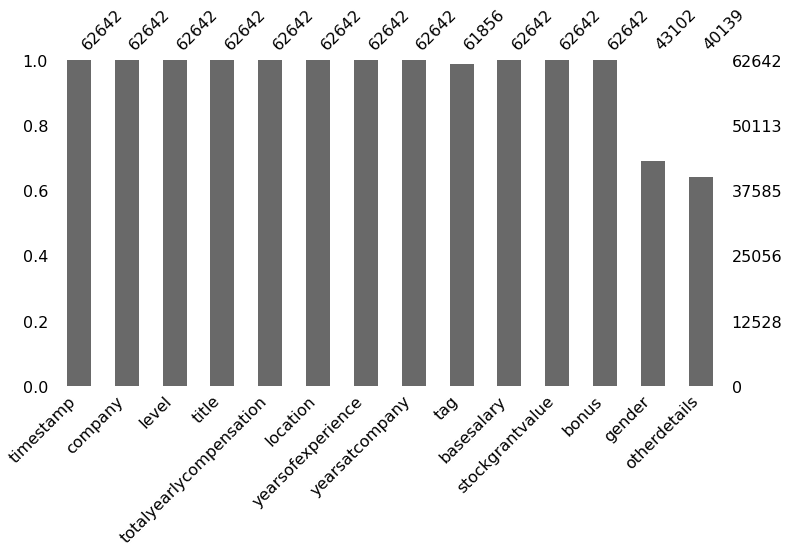

In [39]:
#we will begin by visualizing column with the highest number of missing vaues
missingno.bar(df_copy, figsize=(12, 6));

We will then view the location of the missing values

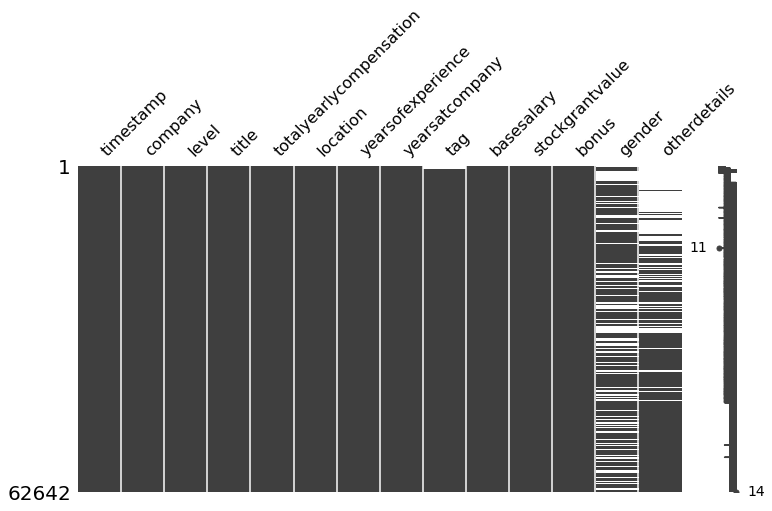

In [37]:
missingno.matrix(df_copy, figsize=(12, 6));

## Data types

we will begin by assigning our columns the correct data type

In [41]:
#checking on the datatypes
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   timestamp                62642 non-null  object
 1   company                  62642 non-null  object
 2   level                    62642 non-null  object
 3   title                    62642 non-null  object
 4   totalyearlycompensation  62642 non-null  object
 5   location                 62642 non-null  object
 6   yearsofexperience        62642 non-null  object
 7   yearsatcompany           62642 non-null  object
 8   tag                      61856 non-null  object
 9   basesalary               62642 non-null  object
 10  stockgrantvalue          62642 non-null  object
 11  bonus                    62642 non-null  object
 12  gender                   43102 non-null  object
 13  otherdetails             40139 non-null  object
dtypes: object(14)
memory usage: 6.7+ MB


As we can see most of our datatypes are in the form of onjects even for some numeric columns and datetime columns lets convert this columns to their respective datatypes.

In [43]:
#to datetime
df_copy["timestamp"] = pd.to_datetime(df['timestamp'])

#to numeric
df_copy[['yearsofexperience','basesalary','bonus','stockgrantvalue','totalyearlycompensation','yearsatcompany']] = df_copy[['yearsofexperience','basesalary','bonus','stockgrantvalue','totalyearlycompensation','yearsatcompany']].apply(pd.to_numeric)

In [44]:
#checking if the changes have been applied
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                62642 non-null  datetime64[ns]
 1   company                  62642 non-null  object        
 2   level                    62642 non-null  object        
 3   title                    62642 non-null  object        
 4   totalyearlycompensation  62642 non-null  int64         
 5   location                 62642 non-null  object        
 6   yearsofexperience        62642 non-null  int64         
 7   yearsatcompany           62642 non-null  int64         
 8   tag                      61856 non-null  object        
 9   basesalary               62642 non-null  int64         
 10  stockgrantvalue          62642 non-null  int64         
 11  bonus                    62642 non-null  int64         
 12  gender                   43102 n

The chnges have been apllied and we can generate the pandas profiling report